# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


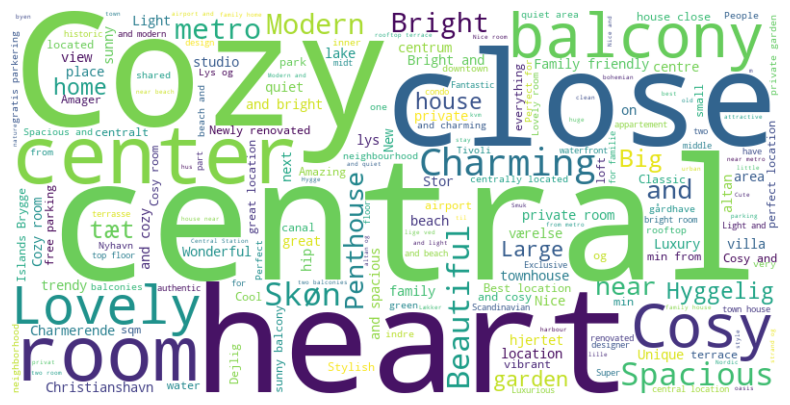

In [5]:
# pip install pandas
# pip install scikit-learn
# pip install wordcloud
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan
data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

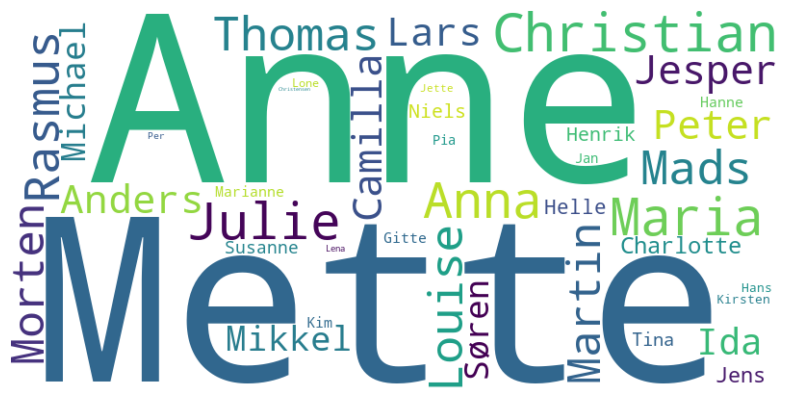

Counts of common Danish names:
Anders: 103
Mette: 164
Morten: 109
Anne: 169
Michael: 74
Martin: 111
Kirsten: 24
Julie: 145
Mikkel: 80
Lars: 102
Thomas: 120
Mads: 122
Niels: 53
Pia: 26
Lena: 11
Rasmus: 129
Henrik: 53
Maria: 153
Hanne: 30
Jens: 60
Marianne: 33
Christian: 161
Kim: 31
Søren: 74
Jesper: 108
Susanne: 47
Anna: 137
Peter: 106
Helle: 56
Gitte: 33
Camilla: 108
Charlotte: 73
Tina: 50
Lone: 21
Louise: 119
Ida: 89
Hans: 23
Jette: 18
Jan: 27
Christensen: 1
Per: 15


In [4]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Load the dataset
data = pd.read_csv('listings.csv')

# Define common Danish names
common_danish_names_and_surnames = set([
    'Anne', 'Mette', 'Kirsten', 'Hanne', 'Anna', 'Helle', 'Maria', 'Susanne', 'Lena', 'Marianne', 'Camilla', 'Lone', 'Louise', 'Pia',
    'Charlotte', 'Tina', 'Gitte', 'Ida', 'Jette', 'Julie', 'Peter', 'Michael', 'Lars', 'Jens', 'Thomas', 'Henrik', 'Søren',
    'Christian', 'Martin', 'Jan', 'Morten', 'Jesper', 'Anders', 'Mads', 'Niels', 'Rasmus', 'Mikkel', 'Per', 'Kim', 'Hans',
    'Nielsen', 'Jensen', 'Hansen', 'Andersen', 'Pedersen', 'Christensen', 'Larsen', 'Sørensen', 'Rasmussen', 'Jørgensen',
    'Petersen', 'Madsen', 'Kristensen', 'Olsen', 'Thomsen', 'Christiansen', 'Poulsen', 'Johansen', 'Møller', 'Mortensen'
])

# Function to check if a name is likely to be a person's name
def is_person_name(name):
    if isinstance(name, str) and not bool(re.search(r'\d', name)):  # Check if it's a string and contains no digits
        name_parts = name.split()
        if len(name_parts) > 0 and re.match(r'^[A-Za-zÆØÅæøå]+$', name_parts[0]):  # Ensure name is not empty
            return name_parts[0] in common_danish_names
    return False

# Filter names and count occurrences
filtered_names = data['host_name'].dropna().astype(str).apply(lambda x: x if is_person_name(x) else '')

# Count occurrences of each valid name
name_counts = Counter([name.split()[0] for name in filtered_names if is_person_name(name)])

# Combine the names based on their counts
combined_names = ' '.join([name for name, count in name_counts.items() for _ in range(count)])

# Generate the word cloud based on frequency of name
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(name_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

# Print the counts of common Danish names
print("Counts of common Danish names:")
for name, count in name_counts.items():
    print(f"{name}: {count}")

# The data does correspond more or less to Danmarks Statistik, as Anne, Maria and Mette are some of the most popular names.


### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [ ]:
# State your solution here. Add more cells if needed.

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [31]:
# State your solution here. Add more cells if needed.

import pandas as pd

# Load data
data = pd.read_csv('listings.csv')

# Filter relevant columns
data_limited = data[["id",
    "neighbourhood_cleansed", 
    "room_type", 
    "price",
    "review_scores_rating",
    "number_of_reviews",
    "minimum_nights"]]

# Remove rows with no reviews and drop NaNs
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0].dropna()

# Clean and convert price (like removing $ sign if needed)
data_filtered['price'] = data_filtered['price'].replace('[\\$,]', '', regex=True).astype(float)

# Correct the names of neighborhoods with common misspellings
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")

# Get a list of distinct neighborhoods after correction
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Group by neighborhood and analyze room_type and price
grouped = data_filtered.groupby('neighbourhood_cleansed')


# Chosen features:
# 1. Price Analysis: 
# The table gives insights into the spread of prices across neighborhoods, 
# including the range (Min/Max), standard deviation, and quartiles, 
# which can help identify which neighborhoods are expensive and which are more affordable.

# 2. Room Type Distribution: 
# The room type breakdown reveals what kind of accommodations (e.g., "Entire home/apt", "Private room") 
# are more common in certain neighborhoods.

# Aggregate using descriptive statistics for 'price' for each neighborhood (excluding mode)
price_stats = grouped['price'].agg(['mean', 'median', 'std', 'var', 'min', 'max']).round(2)

review_scores_mean = grouped['review_scores_rating'].agg(['mean']).rename(columns={'mean': 'Rating Mean'}).round(2)

# Quartiles for price
price_quartiles = grouped['price'].quantile([0.25, 0.5, 0.75]).unstack()

# Calculate the mode for price separately (since it needs special handling)
mode_stats = grouped['price'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Combine the price stats with quartiles and mode
price_stats_combined = pd.concat([price_stats, price_quartiles, mode_stats.rename('Mode')], axis=1)
price_stats_combined.columns = ['Price Mean', 'Price Median', 'Price Standard Deviance', 'Price Variance', 'Min Price', 'Max Price', 'Price 25th Percentile', 'Price 50th Percentile', 'Price 75th Percentile', ' Price Mode']

# Room type distribution by neighborhood
room_type_counts = grouped['room_type'].value_counts().unstack().fillna(0)
#value_counts gets the occurence of each unique value

# Combine the room type counts and price stats
neighborhood_analysis = pd.concat([price_stats_combined, review_scores_mean, room_type_counts], axis=1)

# Display the final analysis
display(neighborhood_analysis)


,Price Mean,Price Median,Price Standard Deviance,Price Variance,Min Price,Max Price,Price 25th Percentile,Price 50th Percentile,Price 75th Percentile,Price Mode,Rating Mean,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_cleansed,,,,,,,,,,,,,,,
Amager Vest,1204.64,1000.0,2114.91,4472858.79,200.0,64900.0,725.00,1000.0,1400.00,1000.0,4.78,915.0,0.0,149.0,2.0
Amager st,1018.94,851.0,703.78,495311.08,135.0,10000.0,650.00,851.0,1190.00,1000.0,4.78,793.0,3.0,131.0,1.0
Bispebjerg,910.77,746.0,1827.51,3339776.70,143.0,44000.0,536.50,746.0,962.00,700.0,4.77,510.0,0.0,96.0,1.0
Brønshøj-Husum,869.42,750.0,550.71,303276.80,145.0,4462.0,498.00,750.0,1100.00,500.0,4.71,217.0,0.0,70.0,2.0
Frederiksberg,1215.58,1000.0,1862.06,3467273.28,185.0,58000.0,750.00,1000.0,1339.00,1000.0,4.80,1050.0,0.0,133.0,0.0
Indre By,1575.59,1350.0,1084.19,1175465.91,165.0,20000.0,995.00,1350.0,1876.50,1200.0,4.75,1707.0,10.0,130.0,4.0
Nørrebro,1014.50,900.0,608.90,370755.29,79.0,12500.0,720.00,900.0,1198.00,1000.0,4.80,1892.0,0.0,166.0,3.0
Valby,932.14,800.0,622.84,387925.00,127.0,7429.0,600.00,800.0,1119.50,700.0,4.77,450.0,0.0,89.0,0.0
Vanløse,874.54,750.5,502.56,252567.58,200.0,3643.0,536.75,750.5,1091.75,1200.0,4.77,254.0,0.0,44.0,0.0


### 5. Based on self-chosen features, develop three different regression models that can predict the price of a rental property. Remember to divide your data into training data and test data. Comment on your findings.

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

dataCorrelation = pd.read_csv('listings.csv')
dataCorrelation_limited = dataCorrelation[["id",
    "price",                                      
    "host_listings_count", 
    "host_total_listings_count", 
    "accommodates", 
    "bedrooms", 
    "beds", 
    "minimum_nights",
    "maximum_nights", 
    "minimum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights", 
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "number_of_reviews",
    "number_of_reviews_ltm",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "reviews_per_month",
    "host_has_profile_pic",
    "host_identity_verified"]]

dataCorrelation_limited['price'] = dataCorrelation_limited['price'].replace('[\$,]', '', regex=True).astype(float)
dataCorrelation_limited["host_has_profile_pic"] = dataCorrelation_limited['host_has_profile_pic'].replace({'f': 0, 't': 1}, regex=True).astype(float)
dataCorrelation_limited["host_identity_verified"] = dataCorrelation_limited['host_identity_verified'].replace({'f': 0, 't': 1}, regex=True).astype(float)


correlation_matrix = dataCorrelation_limited.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)

<>:43: SyntaxWarning: invalid escape sequence '\$'
<>:43: SyntaxWarning: invalid escape sequence '\$'
C:\Users\aleja\AppData\Local\Temp\ipykernel_5992\2110493723.py:43: SyntaxWarning: invalid escape sequence '\$'
  dataCorrelation_limited['price'] = dataCorrelation_limited['price'].replace('[\$,]', '', regex=True).astype(float)


price                          1.000000
accommodates                   0.249479
beds                           0.228420
bedrooms                       0.192483
availability_30                0.155805
availability_60                0.148073
availability_90                0.138292
availability_365               0.104066
host_listings_count            0.096796
host_total_listings_count      0.077710
review_scores_location         0.076005
minimum_nights                 0.049091
minimum_minimum_nights         0.047084
review_scores_cleanliness      0.027115
maximum_nights                 0.026968
minimum_nights_avg_ntm         0.026819
host_identity_verified         0.007691
maximum_maximum_nights         0.006694
host_has_profile_pic           0.006296
review_scores_rating           0.005763
review_scores_accuracy         0.005297
maximum_nights_avg_ntm         0.002356
id                            -0.002498
review_scores_communication   -0.002654
minimum_maximum_nights        -0.003333


C:\Users\aleja\AppData\Local\Temp\ipykernel_5992\2110493723.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCorrelation_limited['price'] = dataCorrelation_limited['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\aleja\AppData\Local\Temp\ipykernel_5992\2110493723.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataCorrelation_limited["host_has_profile_pic"] = dataCorrelation_limited['host_has_profile_pic'].replace({'f': 0, 't': 1}, regex=True).astype(float)
C:\Users\aleja\AppData\Local\Temp

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Load the data
data = pd.read_csv('listings.csv')

# Step 2: Filter relevant columns
data_limited = data[[
    "neighbourhood_cleansed",
    "room_type",
    "price",
    "accommodates",
    "bedrooms",
    "beds",
    "number_of_reviews",
    "review_scores_rating",
    "review_scores_cleanliness",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365"]]

# Step 3: Remove rows with no reviews and handle missing data
data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]
data_filtered = data_filtered.dropna()

# Step 4: Correct neighbourhood names
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace({
    "Nrrebro": "Nørrebro", "sterbro": "Østerbro", "Vanlse": "Vanløse", "Brnshj-Husum": "Brønshøj-Husum"})

# Step 5: Remove dollar signs and commas from the 'price' column and convert to float
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Step 6: Filter out prices higher than 4000
price_threshold = 4000
data_filtered = data_filtered[data_filtered['price'] <= price_threshold]

# Step 7: One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data_filtered, columns=['room_type', 'neighbourhood_cleansed'], drop_first=True)

# Step 8: Define features (X) and target (y)
X = data_encoded.drop('price', axis=1).to_numpy()  # Convert to numpy array
y = data_encoded['price'].to_numpy()  # Convert to numpy array

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Polynomial features OLS
poly_ols = PolynomialFeatures(degree=1, include_bias=False)
X_poly_ols = poly_ols.fit_transform(X)

# Step 9: Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=7)

# Step 9.2: Split data into training and testing sets OLS
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(X_poly_ols, y, test_size=0.2, random_state=7)

# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Scaling the features OLS
scaler = StandardScaler()
x_train_scaled_ols = scaler.fit_transform(x_train_ols)
x_test_scaled_ols = scaler.transform(x_test_ols)

# Implementing OLS (Linear Regression)
ols = LinearRegression()
ols.fit(x_train_scaled_ols, y_train_ols)

ols_predictions = ols.predict(x_test_scaled_ols)
ols_mae = mean_absolute_error(y_test_ols, ols_predictions)
ols_mse = mean_squared_error(y_test_ols, ols_predictions)
ols_r2 = r2_score(y_test_ols, ols_predictions)
print("\nOLS (Linear Regression) Performance:")
print(f"Mean Absolute Error: {ols_mae}, Mean Squared Error: {ols_mse}, R-squared: {ols_r2}")

# Implementing Lasso Regression
lasso = Lasso(alpha=0.1)  # Use sklearn's implementation for comparison
lasso.fit(x_train_scaled, y_train)

lasso_predictions = lasso.predict(x_test_scaled)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)
print("\nLasso Regression Performance:")
print(f"Mean Absolute Error: {lasso_mae}, Mean Squared Error: {lasso_mse}, R-squared: {lasso_r2}")

# Implementing Ridge Regression
ridge = Ridge(alpha=0.1)  # Use sklearn's implementation for comparison
ridge.fit(x_train_scaled, y_train)

ridge_predictions = ridge.predict(x_test_scaled)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)
print("\nRidge Regression Performance:")
print(f"Mean Absolute Error: {ridge_mae}, Mean Squared Error: {ridge_mse}, R-squared: {ridge_r2}")

# Implementing Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=7)
rf.fit(x_train_scaled, y_train)

rf_predictions = rf.predict(x_test_scaled)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {rf_mae}, Mean Squared Error: {rf_mse}, R-squared: {rf_r2}")

# Implementing Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=7)
dt.fit(x_train_scaled, y_train)

dt_predictions = dt.predict(x_test_scaled)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print("\nDecision Tree Regressor Performance:")
print(f"Mean Absolute Error: {dt_mae}, Mean Squared Error: {dt_mse}, R-squared: {dt_r2}")


<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
C:\Users\aleja\AppData\Local\Temp\ipykernel_5992\2353248797.py:39: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)



OLS (Linear Regression) Performance:
Mean Absolute Error: 279.0280103608953, Mean Squared Error: 159149.44072026023, R-squared: 0.5054502982761545


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.864e+08, tolerance: 3.077e+05
  model = cd_fast.enet_coordinate_descent(



Lasso Regression Performance:
Mean Absolute Error: 269.49442831946715, Mean Squared Error: 151127.06316049094, R-squared: 0.5303794743470505

Ridge Regression Performance:
Mean Absolute Error: 271.2891389149197, Mean Squared Error: 152601.4394685783, R-squared: 0.5257979165351386

Random Forest Regressor Performance:
Mean Absolute Error: 278.00934541694863, Mean Squared Error: 165647.48715121995, R-squared: 0.4852579123671934

Decision Tree Regressor Performance:
Mean Absolute Error: 398.82579975058627, Mean Squared Error: 345553.6481011978, R-squared: -0.07379236034147585
